In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
df = pd.read_csv('/content/cleaned_time_series.csv')

## define the target

In [14]:
data = df['Revenue']

## Train-Test split for 12 months

In [15]:
train = data.iloc[:-12]
test = data.iloc[-12:]

## Fit Model

In [16]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


## Forecast

In [17]:
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

## Evauation

In [18]:
mse = mean_squared_error(test, forecast_mean)
mae = mean_absolute_error(test, forecast_mean)
print(f"MSE: {mse:.2f},\nMAE: {mae:.2f},\nRMSE: {np.sqrt(mse):.2f}")

MSE: 89109068318401.48,
MAE: 8002271.95,
RMSE: 9439759.97


## plotting

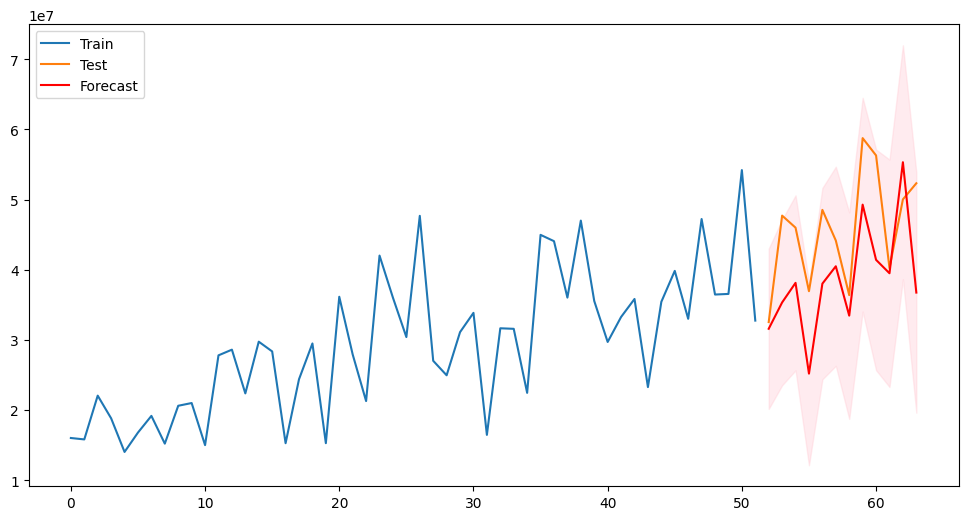

In [19]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, forecast_mean, label="Forecast", color="red")
plt.fill_between(test.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.show()